Exercice base sur un kernel de https://www.kaggle.com/shivamb 



The data files train.csv and test.csv contain gray-scale images of hand-drawn digits, from zero through nine.

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

The training data set, (train.csv), has 785 columns. The first column, called "label", is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image.

Each pixel column in the training set has a name like pixelx, where x is an integer between 0 and 783, inclusive. To locate this pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27, inclusive. Then pixelx is located on row i and column j of a 28 x 28 matrix, (indexing by zero).

For example, pixel31 indicates the pixel that is in the fourth column from the left, and the second row from the top, as in the ascii-diagram below.

Visually, if we omit the "pixel" prefix, the pixels make up the image like this:

000 001 002 003 ... 026 027
028 029 030 031 ... 054 055
056 057 058 059 ... 082 083
 |   |   |   |  ...  |   |
728 729 730 731 ... 754 755
756 757 758 759 ... 782 783 
The test data set, (test.csv), is the same as the training set, except that it does not contain the "label" column.

Your submission file should be in the following format: For each of the 28000 images in the test set, output a single line containing the ImageId and the digit you predict. For example, if you predict that the first image is of a 3, the second image is of a 7, and the third image is of a 8, then your submission file would look like:

ImageId,Label
1,3
2,7
3,8 
(27997 more lines)
The evaluation metric for this contest is the categorization accuracy, or the proportion of test images that are correctly classified. For example, a categorization accuracy of 0.97 indicates that you have correctly classified all but 3% of the images.

## <a> 2. Implement a Neural Network - Binary Classification</a>  

Lets implement a basic neural network in python for binary classification which is used to classify if a given image is 0 or 1.  

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

### 2.1 Dataset Preparation

First step is to load and prepare the dataset

In [20]:
labeled_images = pd.read_csv('src/train.csv')
images = labeled_images.iloc[0:5000,1:]
labels = labeled_images.iloc[0:5000,:1]

/Users/rfibigr/goinfre/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


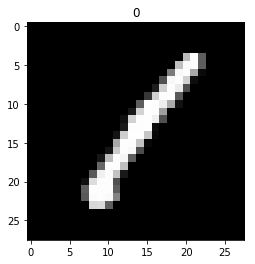

In [21]:
for i in range (1):
    img=images.iloc[i].as_matrix()
    img=img.reshape((28,28))
    plt.imshow(img,cmap='gray')
    plt.title(images.iloc[i,0])
    plt.show()

In [23]:
train = pd.read_csv("src/train.csv")
test = pd.read_csv("src/test.csv")

# include only the rows having label = 0 or 1 (binary classification)
X = train[train['label'].isin([0, 1])]

# target variable
Y = train[train['label'].isin([0, 1])]['label']

# remove the label from X
X = X.drop(['label'], axis = 1)

X.head

<bound method NDFrame.head of        pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0           0       0       0       0       0       0       0       0       0   
1           0       0       0       0       0       0       0       0       0   
2           0       0       0       0       0       0       0       0       0   
4           0       0       0       0       0       0       0       0       0   
5           0       0       0       0       0       0       0       0       0   
12          0       0       0       0       0       0       0       0       0   
15          0       0       0       0       0       0       0       0       0   
17          0       0       0       0       0       0       0       0       0   
23          0       0       0       0       0       0       0       0       0   
35          0       0       0       0       0       0       0       0       0   
37          0       0       0       0       0       0       0       0       0  

### 2.2 Implementing a Activation Function 

We will use sigmoid activation function because it outputs the values between 0 and 1 so its a good choice for a binary classification problem

In [3]:
# implementing a sigmoid activation function
def sigmoid(z):
    s = 1.0/ (1 + np.exp(-z))    
    return s

### 2.3 Define Neural Network Architecture

Create a model with three layers - Input, Hidden, Output. 

In [4]:
def network_architecture(X, Y):
    # nodes in input layer
    n_x = X.shape[0] 
    # nodes in hidden layer
    n_h = 10          
    # nodes in output layer
    n_y = Y.shape[0] 
    return (n_x, n_h, n_y)

### 2.4 Define Neural Network Parameters 

Neural Network parameters are weights and bias which we need to initialze with zero values. The first layer only contains inputs so there are no weights and bias, but the hidden layer and the output layer have a weight and bias term. (W1, b1 and W2, b2)

In [5]:
def define_network_parameters(n_x, n_h, n_y):
    W1 = np.random.randn(n_h,n_x) * 0.01 # random initialization
    b1 = np.zeros((n_h, 1)) # zero initialization
    W2 = np.random.randn(n_y,n_h) * 0.01 
    b2 = np.zeros((n_y, 1)) 

    return {"W1": W1, "b1": b1, "W2": W2, "b2": b2}    

### 2.5 Implement Forward Propagation

The hidden layer and output layer will compute the activations using sigmoid activation function and will pass it in the forward direction. While computing this activation, the input is multiplied with weight and added with bias before passing it to the function. 

In [6]:
def forward_propagation(X, params):
    Z1 = np.dot(params['W1'], X)+params['b1']
    A1 = sigmoid(Z1)

    Z2 = np.dot(params['W2'], A1)+params['b2']
    A2 = sigmoid(Z2)
    return {"Z1": Z1, "A1": A1, "Z2": Z2, "A2": A2}    

### 2.6 Compute the Network Error 

To compute the cost, one straight forward approach is to compute the absolute error among prediction and actual value. But a better loss function is the log loss function which is defines as : 

  -Summ ( Log (Pred) * Actual + Log (1 - Pred ) * Actual ) / m

In [7]:
def compute_error(Predicted, Actual):
    logprobs = np.multiply(np.log(Predicted), Actual)+ np.multiply(np.log(1-Predicted), 1-Actual)
    cost = -np.sum(logprobs) / Actual.shape[1] 
    return np.squeeze(cost)

### 2.7 Implement Backward Propagation

In backward propagation function, the error is passed backward to previous layers and the derivatives of weights and bias are computed. The weights and bias are then updated using the derivatives.  

In [8]:
def backward_propagation(params, activations, X, Y):
    m = X.shape[1]
    
    # output layer
    dZ2 = activations['A2'] - Y # compute the error derivative 
    dW2 = np.dot(dZ2, activations['A1'].T) / m # compute the weight derivative 
    db2 = np.sum(dZ2, axis=1, keepdims=True)/m # compute the bias derivative
    
    # hidden layer
    dZ1 = np.dot(params['W2'].T, dZ2)*(1-np.power(activations['A1'], 2))
    dW1 = np.dot(dZ1, X.T)/m
    db1 = np.sum(dZ1, axis=1,keepdims=True)/m
    
    return {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}

def update_parameters(params, derivatives, alpha = 1.2):
    # alpha is the model's learning rate 
    
    params['W1'] = params['W1'] - alpha * derivatives['dW1']
    params['b1'] = params['b1'] - alpha * derivatives['db1']
    params['W2'] = params['W2'] - alpha * derivatives['dW2']
    params['b2'] = params['b2'] - alpha * derivatives['db2']
    return params

### 2.8 Compile and Train the Model

Create a function which compiles all the key functions and creates a neural network model. 

In [9]:
def neural_network(X, Y, n_h, num_iterations=100):
    n_x = network_architecture(X, Y)[0]
    n_y = network_architecture(X, Y)[2]
    
    params = define_network_parameters(n_x, n_h, n_y)
    for i in range(0, num_iterations):
        results = forward_propagation(X, params)
        error = compute_error(results['A2'], Y)
        derivatives = backward_propagation(params, results, X, Y) 
        params = update_parameters(params, derivatives)    
    return params

In [10]:
y = Y.values.reshape(1, Y.size)
x = X.T.as_matrix()
model = neural_network(x, y, n_h = 10, num_iterations = 10)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


### 2.9 Predictions 

In [11]:
def predict(parameters, X):
    results = forward_propagation(X, parameters)
    print (results['A2'][0])
    predictions = np.around(results['A2'])    
    return predictions

predictions = predict(model, x)
print ('Accuracy: %d' % float((np.dot(y,predictions.T) + np.dot(1-y,1-predictions.T))/float(y.size)*100) + '%')

[0.94994825 0.19882284 0.94994825 ... 0.94994825 0.19882284 0.94994825]
Accuracy: 93%


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


<br>

## <a>3. Implement a Neural Network - Multiclass Classification </a>

In the previous step, I discussed about how to implement a NN for binary classification in python from scratch. Python's libraries such as sklearn provides an excellent implementation of efficient neural networks which can be used to directly implement neural networks on a dataset.  In this section, lets implement a multi class neural network to classify the digit shown in an image from 0 to 9

### 3.1 Dataset Preparation 

Slice the train dataset into train and validation set

In [12]:
from sklearn.model_selection import train_test_split
from sklearn import neural_network
from sklearn import  metrics

Y = train['label'][:10000] # use more number of rows for more training 
X = train.drop(['label'], axis = 1)[:10000] # use more number of rows for more training 
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.20, random_state=42)

### 3.2 Train the Model

Train a neural network model with 10 hidden layers. 

In [13]:
model = neural_network.MLPClassifier(alpha=1e-5, hidden_layer_sizes=(5,), solver='lbfgs', random_state=18)
model.fit(x_train, y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=18, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

### 3.3 Predictions 

In [ ]:
predicted = model.predict(x_val)
print("Classification Report:\n %s:" % (metrics.classification_report(y_val, predicted)))